In [46]:
import nltk # national language toolkit
from konlpy.corpus import kolaw as corpus # kolaw is a Korean corpus
from konlpy.tag import Okt # Okt is a Korean morphological analyzer
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import re # regular expression

t = Okt()

In [47]:
# 헌법 불러오기
ko_con_text = corpus.open('constitution.txt').read() # 내장되어있는 헌법을 불러옴

In [48]:
# 명사 분리
ko_nouns = t.nouns(ko_con_text)

In [49]:
# 불용어 추가
stop_words = ['제', '월', '일', '조', '수', '때', '그', '이', '바', '및', '안','정', '기타', '즉시', '항', '위', '관', '다만', '거나', '인', '경우', '모든', '장']
ko_nouns = [n for n in ko_nouns if n not in stop_words]

In [50]:
# 상위 50개 단어 확인

ko = nltk.Text(ko_nouns)
top50 = ko.vocab().most_common(50)

# ko_nouns_count = nltk.FreqDist(ko_nouns)
# ko_nouns_top50 = ko_nouns_count.most_common(50)
# print(ko_nouns_top50)

In [51]:
# plt font AppleGothic
plt.rcParams['font.family'] = 'AppleGothic'


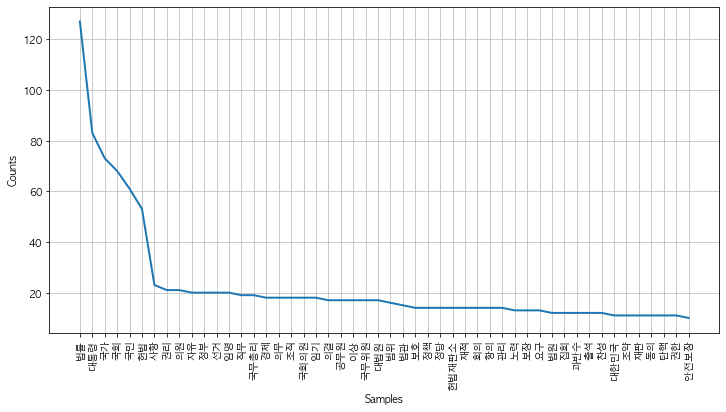

In [52]:
# 상위 50개 빈도수 차트
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [53]:
# 상위 500개 워드클라우드
data = ko.vocab().most_common(500)
tmp_data = dict(data)
# tmp_data = {k:v for k,v in tmp_data.items() if v > 1} # 1번만 나온 녀석 삭제
tmp_data

{'법률': 127,
 '대통령': 83,
 '국가': 73,
 '국회': 68,
 '국민': 61,
 '헌법': 53,
 '사항': 23,
 '권리': 21,
 '의원': 21,
 '자유': 20,
 '정부': 20,
 '선거': 20,
 '임명': 20,
 '직무': 19,
 '국무총리': 19,
 '경제': 18,
 '의무': 18,
 '조직': 18,
 '국회의원': 18,
 '임기': 18,
 '의결': 17,
 '공무원': 17,
 '이상': 17,
 '국무위원': 17,
 '대법원': 17,
 '범위': 16,
 '법관': 15,
 '보호': 14,
 '정책': 14,
 '정당': 14,
 '헌법재판소': 14,
 '재적': 14,
 '회의': 14,
 '항의': 14,
 '관리': 14,
 '노력': 13,
 '보장': 13,
 '요구': 13,
 '법원': 12,
 '집회': 12,
 '과반수': 12,
 '출석': 12,
 '찬성': 12,
 '대한민국': 11,
 '조약': 11,
 '재판': 11,
 '동의': 11,
 '탄핵': 11,
 '권한': 11,
 '안전보장': 10,
 '공포': 10,
 '대한': 10,
 '심판': 10,
 '시행': 10,
 '재판관': 10,
 '위원': 10,
 '정치': 9,
 '효력': 9,
 '대하': 9,
 '체포': 9,
 '절차': 9,
 '형사': 9,
 '근로': 9,
 '처분': 9,
 '위원회': 9,
 '행정각부': 9,
 '명령': 9,
 '사회': 8,
 '질서': 8,
 '생활': 8,
 '제정': 8,
 '인정': 8,
 '구속': 8,
 '구성': 8,
 '확정': 8,
 '상의': 8,
 '제출': 8,
 '국정': 8,
 '자문': 8,
 '사무': 8,
 '것': 7,
 '국민투표': 7,
 '수립': 7,
 '유지': 7,
 '이유': 7,
 '행위': 7,
 '제한': 7,
 '기관': 7,
 '공개': 7,
 '선출': 7,
 '국무회의': 7,
 '둘': 7,


In [54]:
wordCloud = WordCloud(
  background_color='white',
  relative_scaling=0.2,
  font_path='AppleGothic'
).generate_from_frequencies(tmp_data)

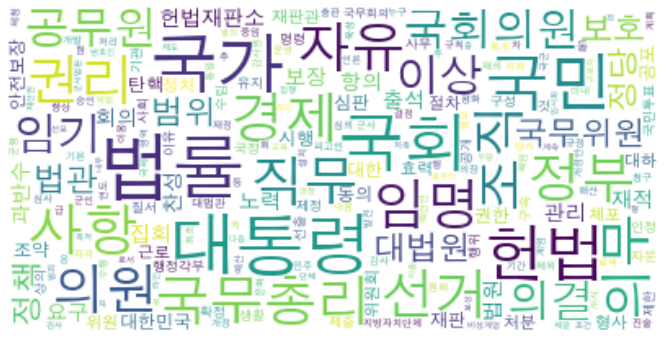

In [55]:
plt.figure(figsize=(12,6))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [68]:
import pandas as pd
# xls 열기
df = pd.read_excel('data/감정단어사전0603.xlsx')
# 감정범주 == '분노' 인 것만 추출
df = df[df['감정범주'] == '분노']
# '빈도' 로 sort
df = df.sort_values(by='감정정도M', ascending=False)

print_full(df)

     일련번호      단어 감정범주    빈도  감정정도M  감정정도STD
164   165    분노하다   분노  91.3   9.04     1.71
25     26     개쌍년   분노  85.0   9.04     1.34
31     32    격노하다   분노  95.0   8.70     1.61
163   164    분개하다   분노  81.3   8.46     1.87
236   237     씹새끼   분노  76.3   8.44     2.06
348   349    증오하다   분노  77.5   8.41     1.75
166   167     분하다   분노  86.3   8.33     2.00
232   233     씨부랄   분노  88.8   8.26     2.18
165   166   분통터지다   분노  92.5   8.25     1.82
24     25     개새끼   분노  81.3   8.22     2.37
226   227      쌍년   분노  81.3   8.18     2.27
159   160     복수심   분노  91.3   8.17     2.04
378   379    치떨리다   분노  71.3   8.06     2.04
32     33    격분하다   분노  88.8   8.06     1.87
355   356    진노하다   분노  83.8   8.03     2.42
26     27     개자식   분노  81.3   7.87     2.21
282   283     옘병할   분노  85.0   7.82     2.39
299   300     울화통   분노  78.8   7.76     2.15
105   106   노여워하다   분노  75.0   7.73     1.92
379   380  치밀어오르다   분노  91.3   7.66     2.14
227   228      쌍놈   분노  78.8   7.52     2.47
11     12 